<a href="https://colab.research.google.com/github/AnIsAsPe/Aprendizaje-por-Refuerzo/blob/main/Notebooks/Gesti%C3%B3n_de_una_red_el%C3%A9ctrica_Aprendizaje_por_refuerzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar [pymgrid](https://github.com/Total-RD/pymgrid) y cargar bibliotecas


In [ ]:
!pip install git+https://github.com/Total-RD/pymgrid/

  Cloning https://github.com/Total-RD/pymgrid/ to /tmp/pip-req-build-7r54k5hk
  Running command git clone -q https://github.com/Total-RD/pymgrid/ /tmp/pip-req-build-7r54k5hk


In [ ]:

from pymgrid import MicrogridGenerator as mg

# para generar un ambiente en OpenAI Gym
#from pymgrid.Environments.pymgrid_cspla import MicroGridEnv 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import time
import sys

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# El Problema

## Red eléctirca "El Espino"

---
![microgrid Espino](https://ars.els-cdn.com/content/image/1-s2.0-S0360544219317682-gr4.jpg)

---

**Objetivo:**

 Optimizar el ***costo*** de la red frente a la incertidumbre la generación de energía solar y de la demanda de energía

**Alternativas:**

1. Operar la red con reglas:

    - Priorizar consumo de la energía solar
    - Si la generación fotovoltaica es mayor que la demanda, se carga la batería
    - Si la energía solar no alcanza a satisfacer el consumo, se descarrga la batería hasta que alcance el 50% de la carga
    - Si la energía solar y la batería no alcanzan a satisfacer la demanda, se prende el generador de gas
    - El generador carga la batería si la demanda es menor que la generación minima de operación.

2. Aprender una ***política*** para decidir una acciones dado un estado

Necesitamos definir las ***acciones posibles*** y los ***estados posibles*** y realizar un proceso de aprendizaje de la política





## Estados, acciones, recompensa/pérdida



**Acciones posibles:**

- Generar energía con gas
- Descargar batería para usar energía almacenada
- Cargar batería (almacenar exceso de energía)

**Estados posibles:**

- Demanda Neta:  Demanda de energía - Generación de energía solar
- Estado de carga de la Batería


**Recompensa/pérdida**
- Costo de generación de electricidad

# Selección de una arquitectura de la microrred utilizando pymgrid

In [ ]:
env = mg.MicrogridGenerator(nb_microgrid=40, random_seed = 7) 
env.generate_microgrid(verbose=True)  #verbose=True despliega la capacidad y costos de cada red



print('\nArquitectura de cada red generada:\n'.upper())
for i in range(env.nb_microgrids):
    print("Microred {}: {}".format(int(i), str(env.microgrids[i].architecture)))

,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,genset_polynom_order,genset_polynom_0,genset_polynom_1,genset_polynom_2,genset_rated_power,genset_pmin,genset_pmax,fuel_cost,genset_co2,grid_weak,grid_power_import,grid_power_export
0,49789,10,1,0.1,56261.57,0.200000,18822,18822,75286,0.9,0.2,1,0.02,3.0,0.720511,0.268439,0.049988,55322.0,0.05,0.9,0.4,2.0,NaN,NaN,NaN
1,89104,10,1,0.1,93559.20,1.000000,81187,81187,324748,0.9,0.2,1,0.02,3.0,4.521240,0.931206,0.002490,99005.0,0.05,0.9,0.4,2.0,0.0,178208.0,178208.0
2,29062,10,1,0.1,29933.86,0.200000,26480,26480,105920,0.9,0.2,1,0.02,3.0,0.076550,0.138980,0.005966,32292.0,0.05,0.9,0.4,2.0,1.0,58124.0,58124.0
3,35286,10,1,0.1,41284.62,1.000000,26297,26297,105187,0.9,0.2,1,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,70572.0,70572.0
4,44890,10,1,0.1,27382.90,0.200000,33455,33455,133817,0.9,0.2,1,0.02,3.0,6.157783,0.944599,0.032755,49878.0,0.05,0.9,0.4,2.0,1.0,89780.0,89780.0
5,1935,10,1,0.1,1470.60,0.200000,997,997,3987,0.9,0.2,1,0.02,3.0,6.913058,0.361482,0.065401,2150.0,0.05,0.9,0.4,2.0,NaN,NaN,NaN
6,52653,10,1,0.1,35804.04,0.768484,21571,21571,86284,0.9,0.2,1,0.02,3.0,2.317811,0.530357,0.075133,58504.0,0.05,0.9,0.4,2.0,1.0,105306.0,105306.0
7,29948,10,1,0.1,41028.76,1.000000,17855,17855,71420,0.9,0.2,1,0.02,3.0,5.291818,0.222093,0.058159,33276.0,0.05,0.9,0.4,2.0,1.0,59896.0,59896.0
8,36968,10,1,0.1,16635.60,0.751005,19040,19040,76157,0.9,0.2,1,0.02,3.0,2.043235,0.876036,0.016017,41076.0,0.05,0.9,0.4,2.0,1.0,73936.0,73936.0
9,94557,10,1,0.1,116305.11,0.330108,30991,30991,123963,0.9,0.2,1,0.02,3.0,9.036381,0.041651,0.020944,105064.0,0.05,0.9,0.4,2.0,NaN,NaN,NaN



ARQUITECTURA DE CADA RED GENERADA:

Microred 0: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microred 1: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microred 2: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microred 3: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microred 4: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microred 5: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microred 6: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microred 7: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microred 8: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microred 9: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Microred 10: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microred 11: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 1}
Microred 12: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microred 13: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microred 14: {'PV': 1, 'battery': 1, 'genset': 0, 'grid': 1}
Microred 15: {'PV': 1, 'battery': 1, 'genset': 1, 'grid': 

In [ ]:
# seleccionamos un ambiente con un arquitectura conveniente para nuestro problema
red = env.microgrids[32]
red.print_info()

Microgrid parameters


,load,cost_loss_load,cost_overgeneration,cost_co2,PV_rated_power,battery_soc_0,battery_power_charge,battery_power_discharge,battery_capacity,battery_efficiency,battery_soc_min,battery_soc_max,battery_cost_cycle,genset_polynom_order,genset_polynom_0,genset_polynom_1,genset_polynom_2,genset_rated_power,genset_pmin,genset_pmax,fuel_cost,genset_co2
0,1392,10,1,0.1,1879.2,0.2,1015,1015,4059,0.9,0.2,1,0.02,3,1.442031,0.547353,0.025381,1547,0.05,0.9,0.4,2


Architecture:
{'PV': 1, 'battery': 1, 'genset': 1, 'grid': 0}
Actions: 
dict_keys(['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'genset'])
Control dictionnary:
['load', 'pv_consummed', 'pv_curtailed', 'pv', 'battery_charge', 'battery_discharge', 'genset']
Status: 
dict_keys(['load', 'hour', 'pv', 'battery_soc', 'capa_to_charge', 'capa_to_discharge'])
Has run mpc baseline:
False
Has run rule based baseline:
False


Cada acción(`Action`) que se aplique a la red será definida por los valores que se pasen a cada una de las claves del diccionario de control.
Cuando se aplique la acción, entonces obtendremos un `Status` nuevo.

## Las series de tiempo de demanda energética y generación solar
Con pymgrid, la red generada, además de una arquitectura, y la capacidad de los elementos de la red, es asociada a dos series de tiempo con  datos históricos de de demanda energética y de  generación  de energía.

Cada observación es una hora y la longitud de la serie es de un año (8769 horas)

In [ ]:
red.print_load_pv()

Load


PV


# Características de los componentes


### **Demanda**

In [ ]:
red.load   # variable aleatoria en función del tiempo

779.6985504820829

### **Generación fotovoltaica (pv)**

In [ ]:
red.pv # variable aleatoria en función del tiempo

0.0

### **Batería**

In [ ]:
## Costante. Cantidad de energía máxima que puede cargar la batería en una hora
red.battery.p_charge_max


1015

In [ ]:
# Constante. Cantidad de energía máxima que puede descargar la batería en una hora
red.battery.p_discharge_max

1015

In [ ]:
# Constante. Estado de carga máxima
red.battery.soc_max

1

In [ ]:
# Constante. Estado de carga mínima
red.battery.soc_min

0.2

In [ ]:
# Variable. Estado de la carga
red.battery.soc

0.2

In [ ]:
# Variable dependiente de soc. Cantidad de energía que la batería puede cargar antes de tener carga completa
red.battery.capa_to_charge  

3608.0

In [ ]:
# Variable dependiente de soc. Cantidad de energía disponible antes de estar totalmente descargada
red.battery.capa_to_discharge  

0.0

### **Generador de combustibles fósiles (genset)**

In [ ]:
# Características del generador

print('Potencia máxima del generador en KW: ', red.genset.rated_power )

print('Costo del combustible por KWh: ${:0.2f} '.format(red.genset.fuel_cost))


Potencia máxima del generador en KW:  1547
Costo del combustible por KWh: $0.40 


# Dinamica del sistema
¿cómo los estados evolucionan en función del tiempo?
-estados
-acciones
-variables aleatorias

¿cómo calculamos la función de ganancia/perdida en cada transición?

Simularemos la operacion en un horizonte determinado

##  Estados

Cada estado del entorno se determina por dos variables:

- Demanda Neta:  Demanda de energía - Generación de energía solar
- Estado de carga de la batería

## Variable Demanda Neta

In [ ]:
demanda_neta = red.load - red.pv
demanda_neta

779.6985504820829

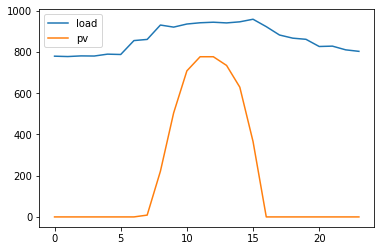

In [ ]:
red.set_horizon(24)
plt.plot(red.forecast_load(), label='load')
plt.plot(red.forecast_pv(), label='pv')
plt.legend()
plt.show()

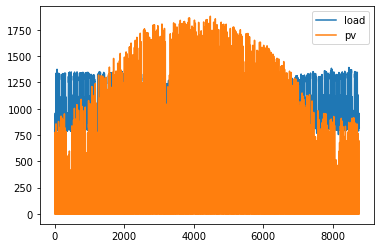

In [ ]:
red.set_horizon(24*365)
plt.plot(red.forecast_load(), label='load')
plt.plot(red.forecast_pv(), label='pv')
plt.legend()
plt.show()

779.6985504820829 1392.0


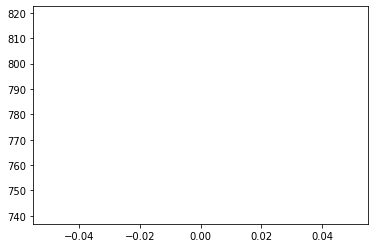

In [ ]:
demanda_neta_fc = red.forecast_load() - red.forecast_pv()
plt.plot(demanda_neta)
print(demanda_neta.min(), demanda_neta_fc.max())

In [ ]:
# Estado de la batería 
red.battery.soc

0.2

# Inicializa la tabla con la política Q 

In [ ]:
red.set_horizon(9000)
demanda_neta = red.forecast_load() - red.forecast_pv() 
pd.Series(demanda_neta).describe()

count    8760.000000
mean      648.659344
std       440.120692
min      -977.159560
25%       523.918323
50%       809.321242
75%       890.776641
max      1392.000000
dtype: float64

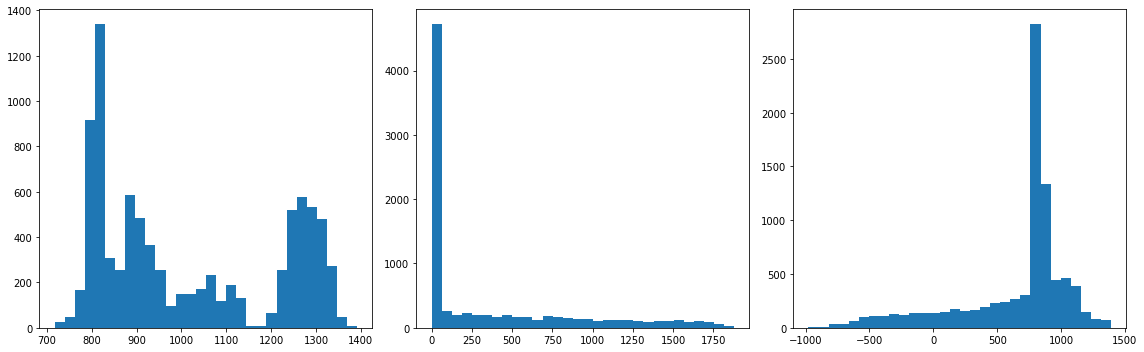

In [ ]:
fig, axs= plt.subplots(1,3, figsize = (16, 5), tight_layout = True)
for s, ax in zip([red.forecast_load(), red.forecast_pv(), demanda_neta] , axs):
  ax.hist(s, bins=30)


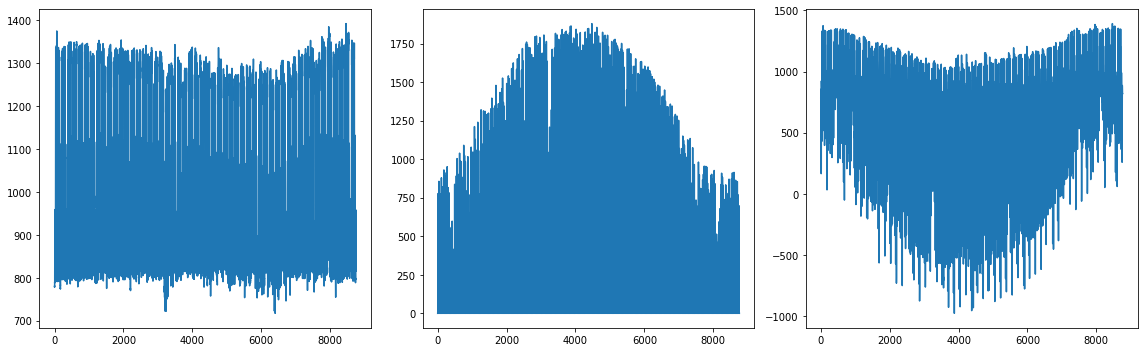

In [ ]:
fig, axs= plt.subplots(1,3, figsize = (16, 5), tight_layout = True)
for s, ax in zip([red.forecast_load(), red.forecast_pv(), demanda_neta] , axs):
  ax.plot(s)

In [ ]:
def init_qtable(red, acciones_posibles):

    # Demanda neta en un horizonte de un año
    red.set_horizon(9000)
    demanda_neta = red.forecast_load() - red.forecast_pv()
    posible_demanda_min = demanda_neta.min() - 2 * demanda_neta.std()
    posible_demanda_max = demanda_neta.max() + 2 * demanda_neta.std()

    #creamos una lista que guardará todas las combinaciones de demanda_neta y estado de la batería
    state = []  
    for d_n in range(int(posible_demanda_min),int(posible_demanda_max+1)):  #ciclo entre la demanda neta minima y máxima DISCRETIZADA    
        for soc in np.arange(red.battery.soc_min, red.battery.soc_max + 0.1, 0.1):  #ciclo entre el estado de carga de la batería minima y máxima  DISCRETIZADO
            soc = round(soc, 1)
            state.append((d_n, soc))            
    Q={}
    #Iniciamos el estado Q(s,a) en cero
    for s in state:
        Q[s] = {}                            
        for a in range(acciones_posibles):
            Q[s][a] = 0

    return Q

In [ ]:
Q = init_qtable(red, 3)
print('Total de estados posibles:',len(Q))  

Total de estados posibles: 37170


In [ ]:
# Si queremos podemos visualizarlo como tabla con pandas
import pandas as pd 
pd.DataFrame.from_dict(Q, orient='index' )

0  1  2
-1857 0.2  0  0  0
      0.3  0  0  0
      0.4  0  0  0
      0.5  0  0  0
      0.6  0  0  0
...       .. .. ..
 2272 0.6  0  0  0
      0.7  0  0  0
      0.8  0  0  0
      0.9  0  0  0
      1.0  0  0  0

[37170 rows x 3 columns]

# Definición de las acciones

* accion 0: cargar batería
* accion 1: descargar batería
* acción 2: generación no renovable (genset)

#### Método run() y su relación con el diccionario de control

descomenta la siguiente linea y observa qué pasa

In [ ]:
# red.run(0 ) # equivalente a step en Open AI Gym

La función `run()` necesita un diccionatrio de control que depende de la arquitectura de nuestra red,  con el que indicaremos las acciones que queremos pasar tomar.


In [ ]:
# Los campos que se pueden usar en el diccionario de control de nuestra red para establecer las acciones son:
red.get_control_dict() 


['load',
 'pv_consummed',
 'pv_curtailed',
 'pv',
 'battery_charge',
 'battery_discharge',
 'genset']

`load` y `pv`, se cargan automáticamente 

In [ ]:
red.reset()

In [ ]:
# Estado actual
demanda_neta = red.load - red.pv
demanda_neta, red.battery.soc

(779.6985504820829, 0.2)

In [ ]:
# Acción generación no renovable

print('estado_o: ', demanda_neta, red.battery.soc)

accion = {
          'pv_consumed': 0,
          'battery_charge':0 ,
          'battery_discharge':0,
          'genset': demanda_neta
          }

red.run(accion)    # equivalente a step() en Open AI Gym

estado_o:  779.6985504820829 0.2


{'battery_soc': 0.2,
 'capa_to_charge': 3607.9999999999995,
 'capa_to_discharge': 0.0,
 'hour': 0,
 'load': 777.9284935561531,
 'pv': 0.0}

In [ ]:
demanda_neta = red.load - red.pv
demanda_neta, red.battery.soc

(777.9284935561531, 0.2)

 **Corre las dos celdas de código varias veces y observa los resultados**

In [ ]:
# accion 0: cargar batería
# accion 1: descargar batería
# acción 2: generación no renovable (genset)

def actions_agent(accion):

    #DEMANDA NETA       
    demanda_neta =  red.load - red.pv                 # Reflexiona: ¿Qué significa que la demanda neta sea positiva?
                                                      #              ¿ y negativa?

    # Límites de nuestro generador
    gen_min = red.genset.p_min * red.genset.rated_power  #potencia mínima del generador
    gen_max = red.genset.p_max * red.genset.rated_power  #potencia maxima del generador


    # Límites de carga de la batería
    capa_to_charge = red.battery.capa_to_charge  # cantidad de energía que la batería puede cargar antes de tener carga completa
    p_charge_max = red.battery.p_charge_max      # cantidad de energía máxima que puede cargar la batería en una hora

    # energía que se puede cargar en la batería
    p_charge = max(
                   0,
                   min(
                       -demanda_neta + gen_min,    # energía disponible
                       capa_to_charge, 
                       p_charge_max)
                   ) 


    # Límites de descarga de la batería
    capa_to_discharge = red.battery.capa_to_discharge
    p_discharge_max = red.battery.p_discharge_max

    # energía que se puede descargar de la batería
    p_discharge = max(
                      0,
                      min(
                          demanda_neta-gen_min,   #energía faltante
                          capa_to_discharge, 
                          p_discharge_max
                          )
                      ) # energía que se puede descargar


    control_dic ={}
    if accion == 0:   # Cargar batería
        control_dict= {'pv_consumed': min(red.pv, red.load),
                       'pv_curtailed':0,
                       'battery_charge': p_charge,
                       'battery_discharge': 0,
                       'genset': gen_min
                       }
    elif accion == 1:   # Descargar bateria
        control_dict = {'pv_consummed': min(red.pv, red.load),
                        'pv_curtailed':0,
                        'battery_charge': 0,
                        'battery_discharge': p_discharge,
                        'genset': gen_min
                        }
   
    elif accion == 2:  #Generación no renovable (genset)
      
        control_dict = {'pv_consummed': min(red.pv, red.load),
                        'pv_curtailed':0,
                        'battery_charge': 0,
                        'battery_discharge': 0,
                        'genset': max(gen_min, 
                                      min(gen_max, red.load - min(red.pv, red.load)))
                       }
    return control_dict

In [ ]:
#red.reset()
print('load: {0:.2f}, pv: {1:.1f}, battery_soc: {2:.1f}'.format(red.load, red.pv, red.battery.soc))
dict_control = actions_agent(2)
red.run(dict_control)
print(dict_control)
print('load: {0:.2f}, pv: {1:.1f}, battery_soc: {2:.1f}'.format(red.load, red.pv, red.battery.soc))
print(red.get_cost())  # costo de la acción por no satisfacer la demanda o  sobregeneración, además del costo del generador

load: 777.93, pv: 0.0, battery_soc: 0.2
{'pv_consummed': 0, 'pv_curtailed': 0, 'battery_charge': 0, 'battery_discharge': 0, 'genset': 777.9284935561531, 'load': 777.9284935561531, 'pv': 0.0, 'loss_load': 0, 'overgeneration': 0}
load: 781.05, pv: 0.0, battery_soc: 0.2
466.7570961336919


# Entrenamiento del agente

El agente aprenderá de las acciones tomadas en cada estado y de los costos ocasionados por esas acciones

## Funciones auxiliares para el entrenamiento del agente

#### epsilon_decreasing_greedy()
La siguiente función, responde a una estrategia de programación dinámica para el dilema explotacion-exploracion


In [ ]:
def espilon_decreasing_greedy(accion, epsilon, acciones_posibles): 
  '''Esta función implementa una estrategía descendiente, para escoger las 
  acciones a medida que el aprendizaje progresa.
  Al principio se busca tener un comportamiento de "exploración" y al final uno de 
  "explotación" de lo aprendido.
  accion: acción escogida previamente
  epsilon: valor actual de epsilon
  acciones_posibles
  '''
  p = np.random.uniform(1.0, 0.0 )
  if p < (1 - epsilon):
        # cuándo epsilon es grande se sigue con la misma acción 
        return accion   # sigue con la misma acción 
  else: 
        # cuando es pequeño, se escoge una al azar
        return np.random.choice(acciones_posibles)    

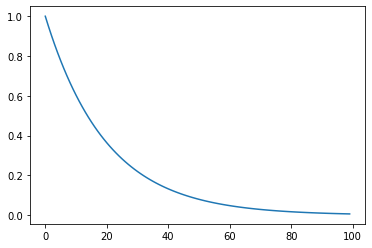

In [ ]:
episodios = 100
epsilon = np.exp(-5 * np.linspace(0, 1, episodios))
plt.plot(epsilon)
plt.show()

### max_dict()

In [ ]:
def max_dict(Qs):
    '''Devuelve la calve del diccionario que tenga el valor máximo'''
    a = max(Qs, key = Qs.get)
    return a

Puedes entender mejor la función anterior con este ejemplo

### print_welcome()

In [ ]:
def print_welcome(idx):
    
    if idx == 0:
        print("------------------------------------")
        print("|             WELCOME              |")
        print("------------------------------------")
    elif idx == 1:
        
        print("t -     STATE  -  ACTION - COST")
        print("================================")
    

---
## Función de entrenamiento del Agente
###Actualización de la política Q
---

$Q(S_t,A_t) \leftarrow Q(s_t,A_t) + \alpha\left[R_{t+1} + \gamma \max_a {Q(S_{t+1},a)}-Q(S_t,A_t)\right]$

In [ ]:
def training_Q_Learning(mg, horizon, episodios):

    #   Q[s][a] += alpha*(r - Q[s][a])  

    acciones_posibles = 3                     
    Q = init_qtable(mg, acciones_posibles)    #inicializar tabla de estados     
    #episodios = 500                           #número de simulaciones para aprender
    epsilon = np.exp(-5*np.linspace(0,1, episodios))              
    alpha = 0.1                        # taza de aprendizaje (learning rate)
    gamma = 0.99
    
    record_cost = []     # función de pérdida

    print_training = "Training Progressing .   "
    print_welcome(0)  
    print("\n")
    
    
    for e in range(episodios+1):  
            #### Control del progreso del entrenamiento   #############################
            if e == 0:
                value_print="\rEpisode " + str(e) +"/" + str(episodios)   
                sys.stdout.write(value_print)   # guarda en buffer datos a imprimir 
                sys.stdout.flush( )             # forza al buffer a imprimir todo en la términal
                
            elif e % 10 == 0:       
                if print_training == "Progreso del entrenamiento .   ":                
                    print_training = "Progreso del entrenamiento ..  "                
                elif print_training == "Progreso del entrenamiento ..  ":            
                    print_training = "Progreso del entrenamiento ...  "           
                else:            
                    print_training = "Progreso del entrenamiento .   "

            value_print="\r"+ print_training +"Episode " + str(e) +"/" + str(episodios)  
            sys.stdout.write(value_print) 
            sys.stdout.flush()   
            ###########################################################################    
            episode_cost = 0                 
            mg.reset()
            eps = epsilon[e-1]
        
            # Calcula las variables de estado iniciales
            demanda_neta = round(mg.load - mg.pv)
            soc = round(mg.battery.soc,1)
            s = (demanda_neta, soc)

            # Escoje la accion con el valor más grande del diccionario Q
            a = max_dict(Q[s])
            # se decide si se continua con la acción elegida (a) o se escoge nuevamente de forma aleatoria   
            a = espilon_decreasing_greedy(a, eps, acciones_posibles)

            for i in range (horizon):
            
                    # Se ejecuta la acción 
                    action = actions_agent(a)        
                    mg.run(action)   

                    # Se obtiene el costo de la acción y se suma al costo del episodio
                    r = -mg.get_cost()                
                    episode_cost += mg.get_cost()     

                    # Se guarda el nuevo estado 
                    demanda_neta = round(mg.load - mg.pv)
                    soc = round(mg.battery.soc,1)
                    s_ = (demanda_neta, soc)             

                    # Se elige nuevamente una acción para ese estado
                    a_ = max_dict(Q[s_])
                    a_ = espilon_decreasing_greedy(a_, eps, acciones_posibles)      ### PENDIENTE__REVISAR FUNCIONMIENTO CON ESTA LINEA     
            
                    if i == horizon-1:  
                
                        Q[s][a] += alpha*(r - Q[s][a])    
      
                    else:
             
                        old_Q = Q[s][a]
                        target = r + gamma*Q[s_][a_]
                        td_error = target - old_Q
                        Q[s][a] = (1-alpha) * Q[s][a] + alpha * td_error
                
                    s, a = s_, a_ 
    print('\n')       
    return Q

In [ ]:
 %time  Q1 = training_Q_Learning(red, horizon=4000, episodios=100)

------------------------------------
|             WELCOME              |
------------------------------------


Progreso del entrenamiento .   Episode 100/100

CPU times: user 2min 29s, sys: 536 ms, total: 2min 30s
Wall time: 2min 31s


In [ ]:
Q1_table = pd.DataFrame.from_dict(Q1, orient='index' )
Q1_table.columns=['accion_0', 'accion_1','accion_2']

In [ ]:
Q1_table[(Q1_table != 0).any(axis=1)]

accion_0     accion_1    accion_2
-977  0.2   -10.621956  -110.091956    0.000000
      0.3   -10.621956  -110.091956 -110.091956
      0.4   -34.494316  -110.091956    0.000000
      0.5   -25.917573  -110.091956 -110.091956
      0.6  -105.778990  -199.332778 -110.091956
...                ...          ...         ...
 1348 0.2 -6834.976272 -6197.118166 -706.554317
 1349 0.2 -6001.855057 -6248.106038 -757.964167
 1350 0.2 -4129.390909 -6301.609007 -701.420799
 1354 0.2 -6095.350948 -5620.803131 -769.414732
 1375 0.2 -6380.067511 -4468.674490 -724.691236

[5911 rows x 3 columns]

In [ ]:
Q1_table.to_csv('/content/drive/MyDrive/Politica_red.csv')

# Prueba de la red operando con la política aprendida

In [ ]:
def testing_Q_Learning(mg, Q, horizon):
    
    mg.reset()
    demanda_neta = round(mg.load - mg.pv)
    soc = round(mg.battery.soc,1)
    s = (demanda_neta, soc)
    a = max_dict(Q[s])
    nombre_accion = {0:'carga batería', 1: 'descarga batería', 2:'generación fósil'}
    total_cost = 0
    print_welcome(1)
    for i in range (horizon):
        action = actions_agent(a)
        mg.run(action)
        cost = mg.get_cost()
        total_cost += cost

        # Se imprime el estado de la red, la acción tomada y el costo generado
        if i < 10:
            print(i," -",(int(demanda_neta),soc), nombre_accion[a], round(total_cost,1), "$")
        else:
            print(i,"-",(int(demanda_neta),soc),nombre_accion[a], round(total_cost,1), "$")
        
        # Se calculan los valores del siguiente estado 
        demanda_neta = round(mg.load - mg.pv)
        soc = round(mg.battery.soc,1)
        s_ = (demanda_neta, soc)

        # Se obtiene la acción con menor costo en el estado s_
        a_ = max_dict(Q[s_])

        # se actualizan los valores de s y a
        s, a = s_, a_  

In [ ]:
testing_Q_Learning(red ,Q1, 4000)

t -     STATE  -  ACTION - COST
0  - (780, 0.2) generación fósil 467.8 $
1  - (778, 0.2) generación fósil 934.6 $
2  - (781, 0.2) generación fósil 1403.2 $
3  - (780, 0.2) generación fósil 1871.5 $
4  - (790, 0.2) generación fósil 2345.2 $
5  - (788, 0.2) generación fósil 2817.9 $
6  - (855, 0.2) generación fósil 3331.1 $
7  - (852, 0.2) generación fósil 3842.5 $
8  - (709, 0.2) generación fósil 4268.0 $
9  - (416, 0.2) generación fósil 4517.7 $
10 - (227, 0.2) generación fósil 4654.1 $
11 - (165, 0.2) generación fósil 4753.0 $
12 - (167, 0.2) generación fósil 4853.4 $
13 - (206, 0.2) generación fósil 4977.2 $
14 - (317, 0.2) generación fósil 5167.4 $
15 - (593, 0.2) generación fósil 5523.4 $
16 - (923, 0.2) generación fósil 6077.1 $
17 - (882, 0.2) generación fósil 6606.6 $
18 - (867, 0.2) generación fósil 7126.9 $
19 - (862, 0.2) generación fósil 7643.8 $
20 - (827, 0.2) generación fósil 8139.8 $
21 - (828, 0.2) generación fósil 8636.9 $
22 - (810, 0.2) generación fósil 9123.1 $
23 -

### Comparar el desempeño cuando se aumenta la politica variando el número de episodios 

In [ ]:
 %time  Q2 = training_Q_Learning(red, horizon=4000, episodios=100)

------------------------------------
|             WELCOME              |
------------------------------------


Progreso del entrenamiento .   Episode 100/100

CPU times: user 2min 24s, sys: 555 ms, total: 2min 24s
Wall time: 2min 25s


In [ ]:
# Con la política con solo 100 episodios
testing_Q_Learning(red,Q2, 4000)

t -     STATE  -  ACTION - COST
0  - (780, 0.2) generación fósil 467.8 $
1  - (778, 0.2) generación fósil 934.6 $
2  - (781, 0.2) generación fósil 1403.2 $
3  - (780, 0.2) generación fósil 1871.5 $
4  - (790, 0.2) generación fósil 2345.2 $
5  - (788, 0.2) generación fósil 2817.9 $
6  - (855, 0.2) generación fósil 3331.1 $
7  - (852, 0.2) generación fósil 3842.5 $
8  - (709, 0.2) generación fósil 4268.0 $
9  - (416, 0.2) generación fósil 4517.7 $
10 - (227, 0.2) generación fósil 4654.1 $
11 - (165, 0.2) generación fósil 4753.0 $
12 - (167, 0.2) generación fósil 4853.4 $
13 - (206, 0.2) generación fósil 4977.2 $
14 - (317, 0.2) generación fósil 5167.4 $
15 - (593, 0.2) generación fósil 5523.4 $
16 - (923, 0.2) generación fósil 6077.1 $
17 - (882, 0.2) generación fósil 6606.6 $
18 - (867, 0.2) generación fósil 7126.9 $
19 - (862, 0.2) generación fósil 7643.8 $
20 - (827, 0.2) generación fósil 8139.8 $
21 - (828, 0.2) generación fósil 8636.9 $
22 - (810, 0.2) generación fósil 9123.1 $
23 -